# single label multiclass classification

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [5]:
type(train_data[0])

list

In [6]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
dir(reuters)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_remove_long_seq',
 'absolute_import',
 'division',
 'get_file',
 'get_word_index',
 'json',
 'load_data',
 'np',
 'print_function',
 'warnings']

In [8]:
# index: word->num
word_index = reuters.get_word_index()
def decode_text(nums):
    # reverse the index
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i-3, '?') for i in nums])

In [9]:
print(decode_text(train_data[0]))

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [10]:
print(decode_text(train_data[1]))

? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


In [11]:
max([max(seq) for seq in train_data])

9999

In [12]:
min([min(seq) for seq in train_data])

1

## vectorize the data

In [13]:
import numpy as np

In [14]:
def vectorize_text_data(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1;
    return results

In [15]:
x_train = vectorize_text_data(train_data)

In [16]:
from keras.utils.np_utils import to_categorical

In [17]:
y_train = to_categorical(train_labels)

In [18]:
partial_x_train = x_train[1000:]
x_val = x_train[:1000]
partial_y_train = y_train[1000:]
y_val = y_train[:1000]

In [19]:
x_test = vectorize_text_data(test_data)
y_test = to_categorical(test_labels)

In [20]:
max(train_labels)

45

In [21]:
from keras import models
from keras import layers

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [24]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 175us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 63us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 64us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

In [25]:
import matplotlib.pyplot as plt

In [29]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [34]:
train_loss = history.history.get('loss')
train_acc = history.history.get('acc')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_acc')
epochs = [i for i in range(1, 1+len(train_loss))]

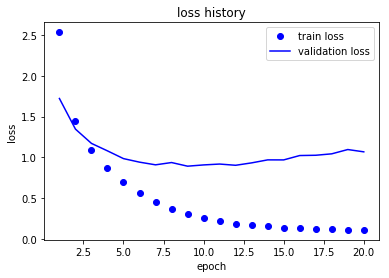

In [36]:
plt.plot(epochs, train_loss, 'bo', label='train loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss history')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

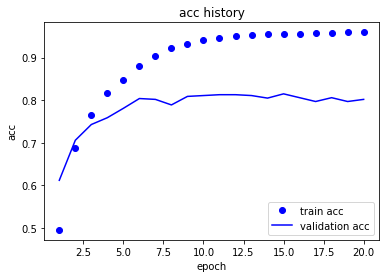

In [37]:
plt.plot(epochs, train_acc, 'bo', label='train acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('acc history')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()
plt.show()

# retrain the model with the whole train data

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [43]:
model.fit(x_train, train_labels, epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 1s 65us/step - loss: 2.4632 - acc: 0.5536
Epoch 2/9
8982/8982 [==============================] - 1s 58us/step - loss: 1.3300 - acc: 0.7112
Epoch 3/9
8982/8982 [==============================] - 1s 58us/step - loss: 1.0048 - acc: 0.7871
Epoch 4/9
8982/8982 [==============================] - 1s 58us/step - loss: 0.7918 - acc: 0.8346
Epoch 5/9
8982/8982 [==============================] - 1s 58us/step - loss: 0.6302 - acc: 0.8737
Epoch 6/9
8982/8982 [==============================] - 1s 59us/step - loss: 0.5011 - acc: 0.8992
Epoch 7/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.4060 - acc: 0.9135
Epoch 8/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.3312 - acc: 0.9275
Epoch 9/9
8982/8982 [==============================] - 1s 57us/step - loss: 0.2776 - acc: 0.9391


In [44]:
model.evaluate(x_test, test_labels)

2246/2246 [==============================] - 0s 116us/step


[0.9428044974750849, 0.7943009795191451]

In [46]:
predictions = model.predict(x_test)

In [51]:
np.sum(predictions[9])

1.0000001

In [52]:
print([np.argmax(vec) for vec in predictions][0])

4
